# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [5]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [6]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034L,)
test label shape: (677L,)
dev label shape: (676L,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [218]:
def P1(num_examples=5):
### STUDENT START ###
    for index in range(5):
        print "%s) " % index
        print "Label %s " %newsgroups_train.target_names[train_labels[index]]
        print "Message %s " %train_data[index]
    
### STUDENT END ###
P1()

0) 
Label comp.graphics 
Message Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych 
1) 
Label talk.religion.misc 
Message 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for 

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [ ]:
def P2():
    ### STUDENT START ###4
    #Use CountVectorizer to turn the raw training text into feature vectors
    vectorizer = CountVectorizer()
    #first fit then transform raw text into features vectors
    X = vectorizer.fit_transform(train_data)
    print "A "
    # print X.toarray()
    print "What is the size of the vocabulary?" 
    print X.shape[1] #a) 26879
    features = vectorizer.get_feature_names()
   # print X.nnz
    
   # print X.shape[0]
    
   
    print "What is the average number of non-zero features per example?"
   # b= (float(X.nnz)/(float(X.shape[0])*float(X.shape[1])))
    average = float(X.nnz) / X.shape[0]
    b = float(average)*100/X.shape[1]

    print "Average number of non-zero features per example is %s " % (average)
    print "What fraction of the entries in the matrix are non-zero?"
    print "Percent of non-zero entries is %.2f " %(b)
    
    
    #b
    print "\nB"
    print " What are the 0th and last feature strings (in alphabetical order)?"
    print "First feature is %s  " %(features[0])
    print "last feature is %s " %(features[-1])
    #c c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. 
    #Confirm the training vectors are appropriately shaped. 
     
    vectorizer2 = CountVectorizer(vocabulary = ["atheism", "graphics", "space", "religion"])
    Y = vectorizer2.transform(train_data)
    print "\nC"
    print "what's the average number of non-zero features per example?"
    #print Y.shape
    print "Average number of non-zero features per example is %.2f "  %(float(Y.nnz) / Y.shape[0])
    
    print "\nD"
    vectorizer3 = CountVectorizer(analyzer = "char_wb", ngram_range = (2,3))
    #CountVectorizer(analyzer='char', ngram_range=(1, 2), min_df=1
    Y = vectorizer3.fit_transform(train_data)
    print Y.shape[1] #28954
    
    print "\nE"
    vectorizer4 = CountVectorizer(min_df = 10)
    Y = vectorizer4.fit_transform(train_data)
    print Y.shape[1] #3064 - smaller than D 
    
    print "\nF"
    vocabulary1 = vectorizer.vocabulary_
    vectorizerF = CountVectorizer()
    Y = vectorizerF.fit_transform(dev_data)
    vocabulary2 = vectorizerF.vocabulary_
    difference = 0
    #print vocabulary2
    
    for k in vocabulary2.keys():
        if k not in vocabulary1.keys():            
            difference += 1
    print "Difference is %s" %difference
    print "%s / %s : %s " %(difference, float(len(vocabulary2)),difference/float(len(vocabulary2))) 


    
    ### STUDENT END ###
P2()

(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [15]:
def P3():
### STUDENT START ###
    vectorizer = CountVectorizer()
    #X = vectorizer.fit(train_data)
    Y = vectorizer.fit_transform(train_data)
    X = vectorizer.transform(dev_data)
    knnClassifier = KNeighborsClassifier()
    trainClf = knnClassifier.fit(Y, train_labels)
    predictions = knnClassifier.predict(X)
    print "Score KNN %s" %metrics.f1_score(dev_labels, predictions)

    #Now find optimal value for k
    kList = list(range(1,100))   
    knnClassifier = KNeighborsClassifier(weights='distance') #use distance or not
    gridscv = GridSearchCV(knnClassifier, {'n_neighbors': kList})
    gridscv.fit(Y, train_labels)

    print "Optimal k for KNN : %s " %gridscv.best_params_.values()[0]

    knnClassifier = KNeighborsClassifier(gridscv.best_params_.values()[0])
    trainClf = knnClassifier.fit(Y, train_labels)
    predictions = knnClassifier.predict(X)
    #print "Score KNN for optimal K: %s" %metrics.f1_score(dev_labels, predictions)

    knnClassifier = KNeighborsClassifier(weights='distance', n_neighbors=gridscv.best_params_.values()[0])
    trainClf = knnClassifier.fit(Y, train_labels)
    predictions = knnClassifier.predict(X)
    print "Improved KN Score for optimal K %s" %metrics.f1_score(dev_labels, predictions)

    #now fit MNB and find optimal alpha
    
    mnb = MultinomialNB()

    mnb.fit(Y, train_labels)
    predictions = mnb.predict(X)
    print "MN Score with default alpha %s" %metrics.f1_score(dev_labels, predictions)
    
    
    alphaList = list(x * 0.1 for x in range(0, 10))
    mnb = MultinomialNB()
    gridscv = GridSearchCV(mnb, {'alpha': alphaList})
    gridscv.fit(Y, train_labels)

    print "Optimal alpha for MN: %s" %gridscv.best_params_.values()[0]

    mnb = MultinomialNB(alpha= gridscv.best_params_.values()[0])

    mnb.fit(Y, train_labels)
    predictions = mnb.predict(X)
    print "MN Score with optimal alpha %s" %metrics.f1_score(dev_labels, predictions)

    #logistic regression and optimal C using l2
    
    lr = LogisticRegression(penalty='l2')
    lr.fit(Y, train_labels)

    predictions = lr.predict(X)
    f1_score = metrics.f1_score(dev_labels, predictions)
    print "LR F1 with default C score: %s" %f1_score

    #reuse alpha list here
    cList = list(x * 0.1 for x in range(1, 10))
    lr = LogisticRegression(penalty='l2')
    gridscv = GridSearchCV(lr, {'C': cList})
    gridscv.fit(Y, train_labels)
    weights = []

    print "Optimal C :%s" %gridscv.best_params_.values()[0]

    lr = LogisticRegression(penalty='l2', C=gridscv.best_params_.values()[0])
    lr.fit(Y, train_labels)

    predictions = lr.predict(X)
    f1_score = metrics.f1_score(dev_labels, predictions)
    print "LR F1 with optimal C score: %s" %f1_score

    #weight =[]
    for i in cList:
        w = np.sum(LogisticRegression(C = i, penalty='l2').fit(Y, train_labels).coef_**2)
        print "c= %s, weight=%s" %(i, w)
        #weight.append(w)

    ### STUDENT END ###
P3()





Score KNN 0.428760723622
Optimal k for KNN : 94 
Improved KN Score for optimal K 0.468055469893
MN Score with default alpha 0.777732023602
Optimal alpha for MN: 0.1
MN Score with optimal alpha 0.79030523851
LR F1 with default C score: 0.694417287185
Optimal C :0.2
LR F1 with optimal C score: 0.705873369398
c= 0.1, weight=102.268634745
c= 0.2, weight=184.492539063
c= 0.3, weight=254.838717782
c= 0.4, weight=317.224176536
c= 0.5, weight=373.705057063
c= 0.6, weight=425.542985907
c= 0.7, weight=473.831753192
c= 0.8, weight=518.90096889
c= 0.9, weight=561.500134917


ANSWER:
a. Why doesn't nearest neighbors work well for this problem?
Because the optimal K is very high , we only got 47% accuracy. This is probably because higher K means low 
precision and higher recall. This is probably because of a large number of features for this particular data set.
I have not tried it, but we could probably increase accuracy by applying weights to the features and allow
classifier to focus only on the features that matter the most.

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?
The difference in vocabulary between training and dev data sets is high. Logistic regression has a hard time
with optimal/general fitting.

c. Briefly explain the relationship between the sum and the value of C.

Higher values of C leads low penalty to the features; higher c will result in higher sum of the weights.




(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [55]:
def P4():
### STUDENT START ###
    def p4sub(gramRange):
        lr = LogisticRegression()
        vectorizer = CountVectorizer(ngram_range = (gramRange,gramRange))
        Y = vectorizer.fit_transform(train_data)
        lr.fit(Y, train_labels)
        coefs = lr.coef_
        #coefs
        featureNames = vectorizer.get_feature_names()
        #featureNames
        indices = np.argpartition(lr.coef_, -5)[:,-5:].flatten()
        values = np.take(lr.coef_, indices, axis=1)
        names = [vectorizer.get_feature_names()[idx] for idx in indices]
        values = np.reshape(values, (20,4), order = "F")
        #print indices
        labels = newsgroups_train.target_names
        
        print '       ',labels
        #print "values"
        for i in range(len(names)):
            
            print names[i] ,values[i]

        
    p4sub(1)
    #print
    print "\nFor bigram"
    p4sub(2)
    #names

### STUDENT END ###
P4()

        ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
atheism [ 0.93967925  0.14422268 -0.35543423 -0.7936329 ]
bobby [-0.40983644  0.97765234 -0.39357284 -0.07962628]
religion [-0.44942429 -0.68205398  0.92008448 -0.14919397]
atheists [-0.43459976 -0.4872334  -0.38055053  0.90519763]
deletion [ 0.98975308 -0.3588484  -0.47069334 -0.30891316]
computer [-0.22083053  1.12502514 -0.46533118 -0.27356319]
3d [-0.34073291 -0.70221531  0.93654792 -0.44810035]
file [-0.46356956 -0.3785148  -0.33240068  0.91283112]
graphics [ 0.95370707 -0.33461741 -1.26014533 -0.60777495]
image [-0.61694809  1.26618269 -1.31630369 -0.41850648]
spacecraft [-0.79249237 -0.80657722  2.16236075 -0.2703524 ]
launch [-0.06443856 -0.6267542  -1.17071814  1.1173155 ]
space [ 1.03079314 -0.75818275 -0.57246636 -0.53306195]
nasa [-0.09695939  1.9369045  -0.47965667 -0.10673899]
orbit [-0.32056769 -1.33620456  1.01148095 -0.31608362]
order [-0.83503153 -0.76283375 -0.46769291  1.05473557]
fbi [ 1.12

ANSWER: I think bigram produced less relevant word to a label. It might be a great idea to use bigram after getting rid of short words and unnecessary vocabulary. Some of the phrases i can relate to, like "look up" for comp :) And some I find disturbing like 'the fbi, such lunacy, ignorance is, cheers kent' in religion for bigram. Bigram definitely provide some context!


(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [17]:
## borrowed from nltk.corpus stopwords
stop = [u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u'her',
 u'hers',
 u'herself',
 u'it',
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'then',
 u'once',
 u'here',
 u'there',
 u'when',
 u'where',
 u'why',
 u'how',
 u'all',
 u'any',
 u'both',
 u'each',
 u'few',
 u'more',
 u'most',
 u'other',
 u'some',
 u'such',
 u'no',
 u'nor',
 u'not',
 u'only',
 u'own',
 u'same',
 u'so',
 u'than',
 u'too',
 u'very',
 u's',
 u't',
 u'can',
 u'will',
 u'just',
 u'don',
 u'should',
 u'now']


In [59]:
def P5():
### STUDENT START ###

    def empty_preprocessor(s):
        return s

    def better_preprocessor(s):
        #character stripping etc + frequency
        # try lowercasing everything,
        s = s.lower()
        # replace sequence of numbers
        s = re.sub(r'\d+', ' ', s) 
        # s = filter(lambda c: not c.isdigit(), s)
        #removing various other non-letter characters, 
        s = re.sub("[^a-zA-Z]", " ", s)
        #removing unimportant/common words
        for stopword in stop:
            if stopword == s: s = ''
        #and shortening long words did not help

        return s

   # vectorizer = CountVectorizer(preprocessor = empty_preprocessor)
   # X = vectorizer.fit_transform(train_data)
   # Y = vectorizer.transform(dev_data)
   # print "Vocab for empty_preprocessor: %s" %X.shape[1]
   # lr = LogisticRegression()
   # lr.fit(X, train_labels)
   # predictions = lr.predict(Y)
   # f1_score = metrics.f1_score(dev_labels, predictions)
   # print "F1 score: %s" %f1_score

    print "From p3 we know F1 score: 0.694"

    vectorizer2 = CountVectorizer(preprocessor = better_preprocessor)
    X2 = vectorizer2.fit_transform(train_data)
    Y2 = vectorizer2.transform(dev_data)
    print "Vocab for better_preprocessor: %s" %X2.shape[1]

    lr2 = LogisticRegression(penalty='l2', C=0.35)
    lr2.fit(X2, train_labels)
    predictions2 = lr2.predict(Y2)
    f1_score2 = metrics.f1_score(dev_labels, predictions2)
    print "F1 score: %s" %f1_score2



### STUDENT END ###
P5()

From p3 we know F1 score: 0.694
Vocab for better_preprocessor: 24005
F1 score: 0.707198379628


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

F1 score: 0.682656070955
for L: l1
 Zero weight=105773
 Nonzero weight=1743
F1 score: 0.694417287185
for L: l2
 Zero weight=0
 Nonzero weight=107516


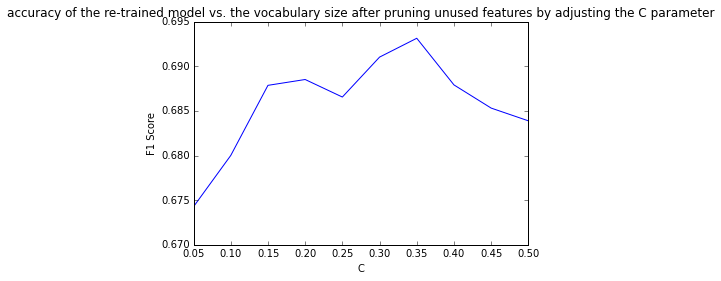

In [36]:
def P6():
    # Keep this random seed here to make comparison easier.
    def findW(l):
        np.random.seed(0)
        vectorizer = CountVectorizer()
        #vocab = vectorizer.vocabulary_
        X = vectorizer.fit_transform(train_data)
        Y = vectorizer.transform(dev_data)
        lr1 = LogisticRegression(penalty=l)#tol=.01
        lr_train1=lr1.fit(X, train_labels)

        predictions = lr1.predict(Y)
        f1_score = metrics.f1_score(dev_labels, predictions)
        print "F1 score: %s" %f1_score
        zeroW=0
        nonZeroW=0
        coefs= lr_train1.coef_
        iterate = len(coefs)
        #nonZeroIndices = []
        #nonzeroes=[]
        features = vectorizer.get_feature_names()
        newVocab = []
        for w in range(iterate):
            for z in range(len(coefs[w])):
                if(coefs[w][z] ==0):
                    zeroW = zeroW+1
                else:
                    nonZeroW = nonZeroW+1

                    #nonzeroes.append(z)
                    newVocab.append(features[z])

        print "for L: %s" %l
        print " Zero weight=%s" %( zeroW)
        print " Nonzero weight=%s" %( nonZeroW)

        return newVocab

    newVocab = findW('l1')
    findW('l2')
    f1_score =[]

    cList = list(x * 0.05 for x in range(1, 11))
    vectorizer = CountVectorizer(vocabulary = set(newVocab))
    X = vectorizer.fit_transform(train_data)
    Y = vectorizer.transform(dev_data)



    for c in cList:
        lr = LogisticRegression(C=c, penalty='l2', tol = 0.01)
        lr=lr.fit(X, train_labels)

        predictions = lr.predict(Y)
        f1_score.append(metrics.f1_score(dev_labels, predictions))



    plt.title("accuracy of the re-trained model vs. the vocabulary size after pruning unused features by adjusting the C parameter")
    plt.xlabel("C")
    plt.ylabel("F1 Score")
    plt.plot(cList, f1_score)   


        ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [38]:
def P7():
    ### STUDENT START ###
    #Use the TfidfVectorizer, Train a logistic regression model with C=100.
    vectorizer = TfidfVectorizer()
    Y = vectorizer.fit_transform(train_data)
    lr= LogisticRegression(C=100)
    fit = lr.fit(Y, train_labels)
    X = vectorizer.transform(dev_data)
    predictions = lr.predict(X)    
    
     #Make predictions on the dev data and show the top 3 documents    
    probabilities = lr.predict_proba(X)
    maxPredictedProb = [max(x) for x in probabilities]
    #print max_probs
    
    
        #where the ratio R is largest, where R is:
#maximum predicted probability / predicted probability of the correct label

    ratios = []
    R=[]
    for i in range(len(dev_labels)):
        #max/prob of correct pred
        r = maxPredictedProb[i] / probabilities[i][dev_labels[i]]
        ratios.append((i, r, dev_labels[i], predictions[i]))
        #print r
    ratios.sort( key=lambda x:x[1], reverse = True)

    for i in ratios[:3]:
        #print i
        print "Predicted: %s" %newsgroups_train.target_names[i[3]]
        print "Correct: %s" %newsgroups_train.target_names[i[2]]
        print dev_data[i[0]]
        print 

    ### STUDENT END ###
P7()

Predicted: comp.graphics
Correct: talk.religion.misc
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anything for their time in making copies, or in any way realize a profit
from the use of this book. See the permissions notic

ANSWER: Religion seems like a ver difficiult label to predict. It's content may be too similar to atheism but in different context. Just vocab alone is not suffiecient to differentiate between the two labels. Most likely we need to use some sort of phrases and order of the words. For the article regarding book of mormon classified as computer label possibly had to do with a high probability associated with the word FTP and RTF. Despite so many other vocabulary related to religious context as well as content, FTP and RTF was able to pull it to computers. We could apply stricter regularization.


(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

In [69]:
#Strategy
#1) reduce vocab,  , use l1 to reduce more vocab, find optimal c and see what happens!
def better_preprocessor(s):
    #character stripping etc + frequency
    # try lowercasing everything,
    s = s.lower()
    # replace sequence of numbers
    s = re.sub(r'\d+', ' ', s) 
    # s = filter(lambda c: not c.isdigit(), s)
    #removing various other non-letter characters, 
    s = re.sub("[^a-zA-Z]", " ", s)
    #removing unimportant/common words
    for stopword in stop:
        if stopword == s: s = ''
    #and shortening long words did not help

    return s


            #reuse alpha list here
vectorizer2 = CountVectorizer( preprocessor = better_preprocessor)
X = vectorizer2.fit_transform(train_data)
Y = vectorizer2.transform(dev_data)
print "Vocab for better_preprocessor: %s" %X2.shape[1]



lr = LogisticRegression(penalty='l1')
lr.fit(X, train_labels)
predictions = lr.predict(Y)
f1_score2 = metrics.f1_score(dev_labels, predictions)
print "F1 score: %s" %f1_score2

coefs= lr.coef_
iterate = len(coefs)

features = vectorizer.get_feature_names()
newVocab = []
for w in range(iterate):
    for z in range(len(coefs[w])):
        if(coefs[w][z] !=0):
            newVocab.append(features[z])

vectorizer = CountVectorizer(vocabulary=set(newVocab))
X = vectorizer.fit_transform(train_data)
Y = vectorizer.transform(dev_data)
print "Vocab for better_preprocessor: %s" %X.shape[1]

cList = list(x * 0.1 for x in range(1, 10))
lr2 = LogisticRegression(penalty='l2')
gridscv = GridSearchCV(lr2, {'C': cList})
gridscv.fit(X2, train_labels)


print "Optimal C :%s" %gridscv.best_params_.values()[0]

lr3 = LogisticRegression(penalty='l2', C=gridscv.best_params_.values()[0])
lr3.fit(X2, train_labels)

predictions = lr3.predict(Y2)
f1_score = metrics.f1_score(dev_labels, predictions)
print "LR F1 with optimal C score: %s" %f1_score

Vocab for better_preprocessor: 1184
F1 score: 0.677008232126
Vocab for better_preprocessor: 1011
Optimal C :0.3
LR F1 with optimal C score: 0.68342618201
